<a href="https://colab.research.google.com/github/Harishchand83077/Handwritten_Digit_Recognition_using_CNN-and-CV/blob/main/Handwritten_Digit_Recognition_using_CNN_and_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Firstly, we will train a CNN (Convolutional Neural Network) on MNIST dataset, which contains a total of 70,000 images of handwritten digits from 0-9 formatted as 28×28-pixel monochrome images.
2. For this, we will first split the dataset into train and test data with size 60,000 and 10,000 respectively.
3. Then, we will preprocess the input data by reshaping the image and scaling the pixel values between 0 and 1.
4. After that, we will design the neural network and train the model.
5. After the model is trained, we will save it for future use.
6. Next, we are going to use a webcam as an input to feed an image of a digit to our trained model.
7. Our model will process the image to identify the digit and return a series of 10 numbers corresponding to the ten digits with an activation on the index of the proposed digit.

In [ ]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.optimize import minimize

In [ ]:
path="/content/mnist-original.mat"
data = loadmat(path)

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
num_of_trainImgs = x_train.shape[0] #60000 here
num_of_testImgs = x_test.shape[0] #10000 here
img_width = 28
img_height = 28

x_train = x_train.reshape(x_train.shape[0], img_height, img_width, 1)
x_test = x_test.reshape(x_test.shape[0], img_height, img_width, 1)
input_shape = (img_height, img_width, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# Converting the class vectors to binary class
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 194s 412ms/step - accuracy: 0.2923 - loss: 2.1577 - val_accuracy: 0.5417 - val_loss: 2.0512
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 207s 425ms/step - accuracy: 0.3807 - loss: 2.0563 - val_accuracy: 0.6836 - val_loss: 1.9143
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 173s 364ms/step - accuracy: 0.4647 - loss: 1.9298 - val_accuracy: 0.7360 - val_loss: 1.7475
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 210s 382ms/step - accuracy: 0.5326 - loss: 1.7805 - val_accuracy: 0.7674 - val_loss: 1.5584
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 179s 332ms/step - accuracy: 0.5868 - loss: 1.6145 - val_accuracy: 0.7904 - val_loss: 1.3626
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 157s 335ms/step - accuracy: 0.6288 - loss: 1.4521 - val_accuracy: 0.8085 - val_loss: 1.1814
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 209s 351ms/step - accuracy: 0.6552 - loss: 1.3062 - val_accuracy: 0.8242 - val_loss: 1.0247
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 217s 384ms/step - accuracy: 0.6752 -

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6237167119979858
Test accuracy: 0.8590999841690063


we observed that with the training, our test loss decreased significantly as we ran our model for 30 epochs and accuracy improved to over 89%. It may not sound like a good figure but let’s test out our model on the real-world input.

In [46]:
model.save('trained_model.h5')

In [47]:
import numpy as np
import cv2
from skimage import img_as_ubyte
from skimage.color import rgb2gray
from keras.models import load_model

In [48]:
# Setting up the videoCapture
width = 640
height = 480
cameraNo = 0

cap = cv2.VideoCapture(cameraNo)
cap.set(3,width)
cap.set(4,height)

False

In [ ]:

model = load_model('trained_model.h5')

In [49]:
import cv2

for i in range(10):  # Check indexes from 0 to 9
    cap = cv2.VideoCapture(i)
    if cap.isOpened():
        print(f"✅ Camera found at index {i}")
        cap.release()
    else:
        print(f"❌ No camera at index {i}")

❌ No camera at index 0
❌ No camera at index 1
❌ No camera at index 2
❌ No camera at index 3
❌ No camera at index 4
❌ No camera at index 5
❌ No camera at index 6
❌ No camera at index 7
❌ No camera at index 8
❌ No camera at index 9


<IPython.core.display.Javascript object>

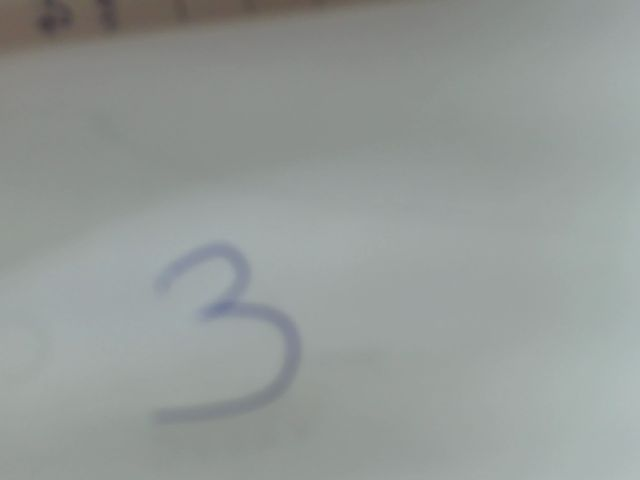

In [67]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow


def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            await new Promise((resolve) => setTimeout(resolve, 3000)); // Give time to adjust camera

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js("takePhoto({})".format(quality))
    binary = b64decode(data.split(',')[1])

    with open(filename, 'wb') as f:
        f.write(binary)

    return filename

# Capture image
image_path = take_photo()

# Load image with OpenCV
img = cv2.imread(image_path)
cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()


In [36]:
# this code is for video
 # Reading the Image
# while True:
#   success, im_orig = cap.read()

KeyboardInterrupt: 

In [68]:
# conver image to greyscale
img_gray = rgb2gray(img)

In [69]:
# Converting the result to uint8 range
img_gray_u8 = img_as_ubyte(img_gray)

In [70]:
# thresholding
(thresh, im_binary) = cv2.threshold(img_gray_u8, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# resizing the image
img_resized = cv2.resize(im_binary,(28,28))

#inverting the image colors
im_gray_invert = 255 - img_resized
# cv2.imshow("invert image", im_gray_invert) # This line caused the error
from google.colab.patches import cv2_imshow # Import cv2_imshow to replace cv2.imshow
cv2_imshow(im_gray_invert) # Use cv2_imshow to display the image in Colab

# Reshaping the image for final transmission
im_final = im_gray_invert.reshape(1,28,28,1)

#Transmitting the image to our model
ans=model.predict(im_final)

#Extracting the result from the array returned and printing the predicted value
ans=np.argmax(ans,axis=1)[0]
print(ans)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
3


In [61]:
# # Putting the predicted value as a text on webcam feed
# cv2.putText(img,'Predicted Digit : '+str(ans),
#                     (50,50),cv2.FONT_HERSHEY_COMPLEX,
#                     1,(0,0,255),1)
# cv2.imshow("Original Image",img)

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


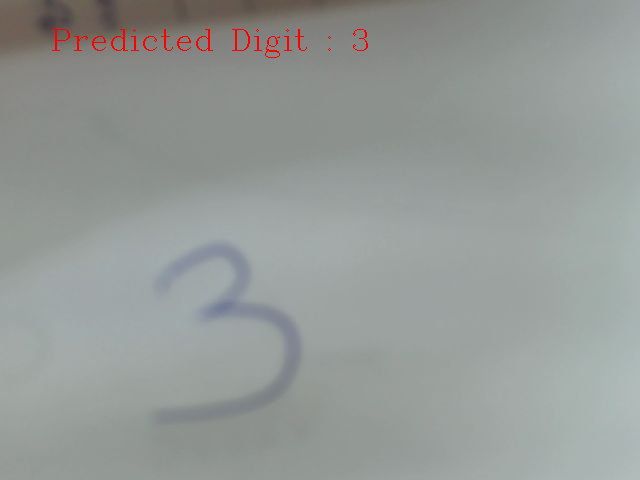

In [71]:
# Putting the predicted value as a text on webcam feed
cv2.putText(img,'Predicted Digit : '+str(ans),
                    (50,50),cv2.FONT_HERSHEY_COMPLEX,
                    1,(0,0,255),1)
# cv2.imshow("Original Image",img) # This line caused the error
from google.colab.patches import cv2_imshow # Import cv2_imshow to replace cv2.imshow
cv2_imshow(img) # Use cv2_imshow to display the image in Colab

In [72]:
# this code is for video capture but i use image
# # handling the exit
# if cv2.waitKey(1) and 0xFF == ord('q'):
#     break

# #  Releasing the camera control and destroying all the windows
# cap.release()
# cv2.destroyAllWindows()

SyntaxError: 'break' outside loop (<ipython-input-72-32b92b5f50ef>, line 3)

✅ Image loaded successfully!


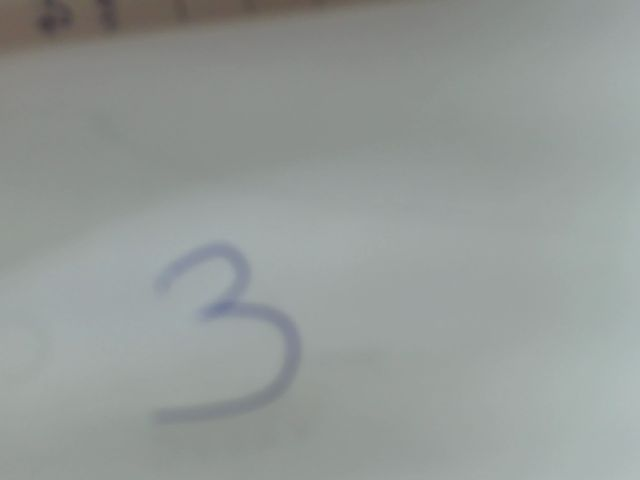

In [82]:
import cv2
from google.colab.patches import cv2_imshow  # Import for Colab

# Load the captured image
image_path = "/content/photo.jpg"  # Replace with your actual file path
im_orig = cv2.imread(image_path)

# Check if the image was loaded successfully
if im_orig is None:
    print("❌ Error: Cannot load image. Check the file path!")
else:
    print("✅ Image loaded successfully!")

    # Show the image in Colab
    cv2_imshow(im_orig)  # Use cv2_imshow instead of cv2.imshow (Colab-only)

# No need for a while loop or keypress chec



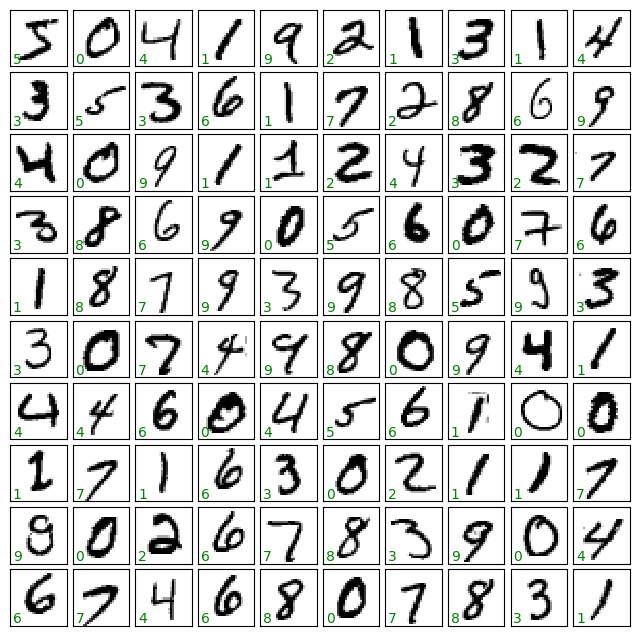

In [83]:
# Plotting the Collage of Images of Digits from Dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_train[i]),transform=ax.transAxes, color='green')
plt.show()

# Just after we load our data via mnist.load_data(), we need to import matplotlib. The image we see
# is the collection of various subplots hence we define a 10×10 subplot, meaning there are 100 images
#  to be accommodated in the plot. You can see we have disabled both the xticks and yticks. In order
#   to relate the image to its target we value, we also put a small text in the bottom left corner of
#   the image. Gridspec_kw basically helps specify the gaps in between the plots, both horizontally
#    and vertically. In the end, we display the plot using plot.show() method.